<a href="https://colab.research.google.com/github/FaizAlam/ML/blob/main/Feature_Engineering_all_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing values- Feature Engineering

Lifecycle of a data science projects :

1) Data Collection strategy --- from company side, 3rd party API's, Surveys, 

Dataset should be collected from multiplee sources

2) Feature Engineering --- Handle missing values

*   Data that will be missing:
      * continous data
      * categorical data










## What are the different types of Missing Data?




### 1. Missing completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Age and Cabin have the Null values. If we carefully observe, these null values are related to each other. Maybe the person died and there was no one to tell the age of that person, so it lead to null values in Age columm. Same would be the case with Cabin column. So this cannot be a MCAR

But embarked can be an MCAR

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2. Missing data not at Random(MNAR):
Systematic missing value


In [ ]:
import numpy as np

In [ ]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
##find the percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

1 is survived - 60% of missing values belong to survived
0 is not survived - 87% of missing val

###3. Missing at Random, MAR:

Missing at Random means  the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
A better name would actually be Missing Conditionally at Random, because the missingness is conditional on another variable.

### All the techniquees of handling missing values

1. Mean/ Median/ Mode replacement
2. Random Sample imputation
3. Capturing NaN value with a new feature
4. End of distribution imputation
5. Arbitrary Imputation
6. Frequent categories imputation


#### Mean/ Median/ Mode imputation
When should we apply?

- Mean/Median imputation has the assumption that data are **missing completely at random(MCAR)**.

Solve this by replacing the NAN with the most frequent occurance of variables.

In [ ]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# % of nan values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
#impute nan values

def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
# lets check if std(standard deviation) has changed ?? 

In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

#just a minor difference,will work

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt

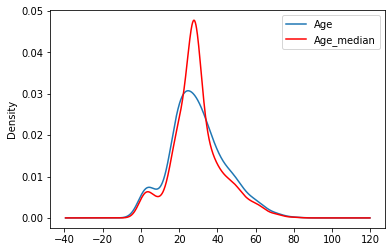

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color="red")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Blue line is real age values. After imputation, median density has increased bcoz we have replaced al NaN values with median


##### Advantages and Disadvantages of Mean/ Median imputation

-Advantages

* Easy to implement(robust to outliers)
* Faster way to obtain the complete dataset

-Disadvantages

* Change or distortion in original variance of data
* Impacts correlation


#### Random Sample imputation
When should we apply?

- Random sampling imputation consists of extracting random observations from the pool of available values in the variable. Random sampling imputation preserves the original distribution

- It assumes that the data are **missing completely at random(MCAR)**


In [ ]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# sum of nan values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
# % of nan values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
#picks up random sample value
df['Age'].dropna().sample()

719    33.0
Name: Age, dtype: float64

In [ ]:
#filling all nan values with sampled values
#dropna bcoz we donot want NaN values in our sample
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
#impute nan values using random sampling

def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  #it will have random sample to fill the NaN
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #replacing random_sample in df
  #pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  #finding rows where df[variable] is null and replacing it with random_sampe which we created
  df.loc[df[variable].isnull(),variable+'_random']= random_sample


In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
# lets check if std(standard deviation) has changed ?? 

In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())
print(df['Age_random'].std())

#see age_random and age has almost equal std

14.526497332334044
13.019696550973194
14.5636540895687


In [ ]:
import matplotlib.pyplot as plt

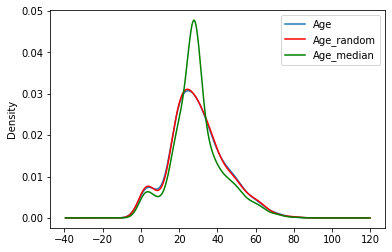

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color="red")
df.Age_median.plot(kind='kde',ax=ax,color="green")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Wow, distribution of Age and Age_random is exactly similar. But median has slight variance

##### Advantages and Disadvantages of Random Sample imputation

-Advantages

* Easy to implement(robust to outliers)
* There is less distortion in original variance of data

-Disadvantages

* Impacts correlation
* In Every situation, randomness won't work


#### Capturing NAN values with a new feature
When should we apply?

- It work welll if the data are not **missing completely at random**

- It captures the importance of nan values

In [ ]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
#creating new feature 'Age_NAN' in which nan values will be replaced with 1 or else 0
df['Age_NAN']= np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df.Age.median()

28.0

Now we can replace NAN values with median value

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Wherever there was nan, that place is intact in Age_NAN. having 1 value

##### Advantages and Disadvantages of Capturing NAN values with new feature

-Advantages

* Easy to implement(robust to outliers)
* Capturs the importance of missing values

-Disadvantages

* creating addition features(if 10 columns have nan values, we'll end up getting 10 additional feature columns)(curse of dimensionality)


#### End of distribution imputation
When should we apply?

- It work welll if the data are not **missing completely at random**

- It also captures the importance of nan values

In [ ]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


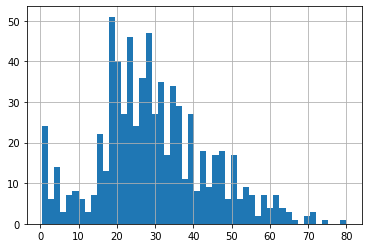

In [ ]:
df.Age.hist(bins=50)

we'll take far away values and then replace nan values with that

In [ ]:
#after 3rd standard deviation
extreme = df.Age.mean()+3*df.Age.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


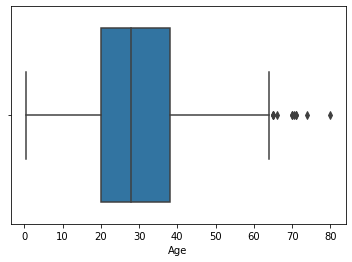

In [ ]:
#checking outliers
import seaborn as sns
sns.boxplot('Age',data=df)

All dots beyong ~65 percentile are outliers

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_dist"]= df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


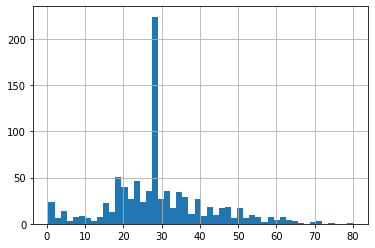

In [ ]:
df['Age'].hist(bins=50)

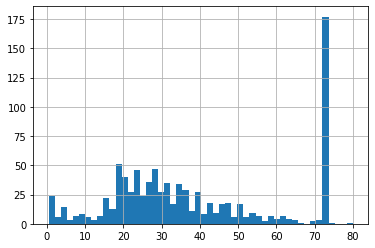

In [ ]:
df['Age_end_dist'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


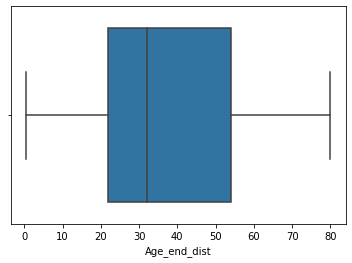

In [ ]:
sns.boxplot('Age_end_dist',data=df)

No outliers

##### Advantages and Disadvantages of Capturing NAN values with new feature

-Advantages

* Easy to implement(robust to outliers)
* Captures the importance of missing values


-Disadvantages

* distorts the original distribution of the variable
* if missingness is not important, it may mask the predictive power of the original variable by distorting the distribution
* if the number of NA is big, it will mask true outliers in the distribution
* if the number of NA is small, the replaced NA may be considered an outliers and pre-processed in a subsequent feature engineering.


#### Arbitrary Value imputation

- It consist of replacing NAN by an arbitrary value


In [2]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
  df[variable+'_zero']= df[variable].fillna(0)
  df[variable+'_hundred']= df[variable].fillna(100)
  

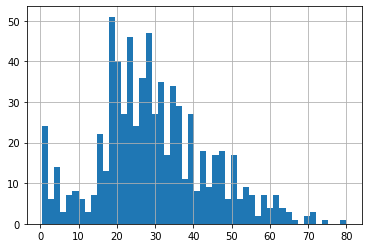

In [4]:
df.Age.hist(bins=50)

Arbitrary values:
- it should not be more freqently present

##### Advantages and Disadvantages of using arbitrary value imputation

-Advantages

* Easy to implement
* Captures the importance of missing values if there is one


-Disadvantages

* distorts the original distribution of the variable
* if missingness is not important, it may mask the predictive power of the original variable by distorting the distribution
* hard to decide which value to use


## Handling categorical  missing values

#### frequent category imputation

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/advanced_house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [4]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [7]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

##### compute the frequency with every feature

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

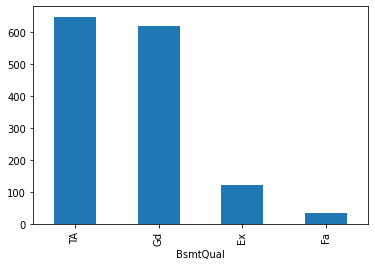

In [9]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

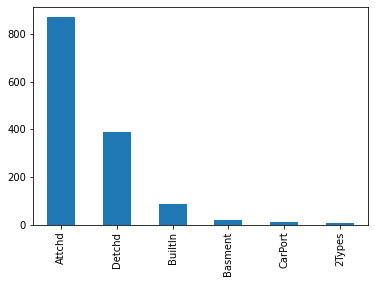

In [10]:
df['GarageType'].value_counts().plot.bar()

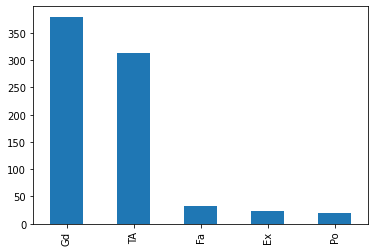

In [11]:
df['FireplaceQu'].value_counts().plot.bar()

In [12]:
df['GarageType'].value_counts().index[0] 
#OR
# df['GarageType'].mode()[0]

'Attchd'

In [13]:
## Replacing function
def impute_nan(df,variable):
  most_freq_cat = df[variable].value_counts().index[0]
  df[variable].fillna(most_freq_cat, inplace = True)
  

In [14]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [15]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [16]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

We replaced FireplaceQu also, which had around 50% missing values. This shouldn't be done

**Advantages**
- Easy to implement
- Faster way to implement

**Disadvantages**


- Since we are using most frequent labels. It may use them in open represented way, if there are many NANs.
- It distorts the relation of the most freqeuent label

#### Adding a variable to capture NAN

In [21]:
df = pd.read_csv('/content/advanced_house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [18]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [22]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [24]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [27]:
frequent = df['BsmtQual'].mode()[0]

In [28]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [29]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


We have captured the importance of missing value of BsmtQual in BsmtQual_var

In [31]:
 df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)

In [32]:
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


**Advantages:**

- easy to implement
- can also use on category which has more % of missing values

**Disadvantages:**

- New features gets created

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [34]:
df = pd.read_csv('/content/advanced_house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [35]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [36]:
def impute_nan(df,variable):
  # here we are creating a new category "Missing"
  df[variable+"newvar"] = np.where(df[variable].isnull(),"Missing",df[variable])
  

In [37]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [38]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [41]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


## Handle categorical features

#### One hot encoding

In [43]:
import pandas as pd

In [46]:
df = pd.read_csv('/content/titanic.csv',usecols=['Sex'])

In [47]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [48]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


we can reject 1 feature as 1 feature is enough to represent 2 different categories. 0 for Male, 1 for female OR 1 for male,0 for female 

In [49]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [50]:
df = pd.read_csv('/content/titanic.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [51]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
df.dropna(inplace=True)

In [53]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [54]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### One hot encoding with many categories in a feature

In [57]:
df = pd.read_csv('/content/mercedes_benz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [59]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ab      1
g       1
ac      1
Name: X0, dtype: int64

In [60]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

we can not do simple one hot encoding in this as it has a plenty of variables

In [63]:
df['X1'].value_counts().sort_values(ascending=False).head(10).index

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [65]:
lst_10 = df['X1'].value_counts().sort_values(ascending=False).head(10).index
lst_10 = list(lst_10)
lst_10
#these are the 10 most frequent categories

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [66]:
import numpy as np
for categories in lst_10:
  df[categories] = np.where(df['X1']==categories,1,0)

In [70]:
lst_10.append('X1')
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
